In [1]:
%matplotlib inline

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
prescriber_data_16 = pd.read_csv('data/heme-onc_d_16.csv', delimiter='\t')
npi_claims = prescriber_data_16[['npi', 'drug_name','total_claim_count']]
npi_claims = pd.pivot_table(npi_claims, index='npi', columns='drug_name', values='total_claim_count', fill_value=0)
top_drugs = npi_claims.sum().sort_values()[::-1][:200].index
npi_claims_top = npi_claims[top_drugs]

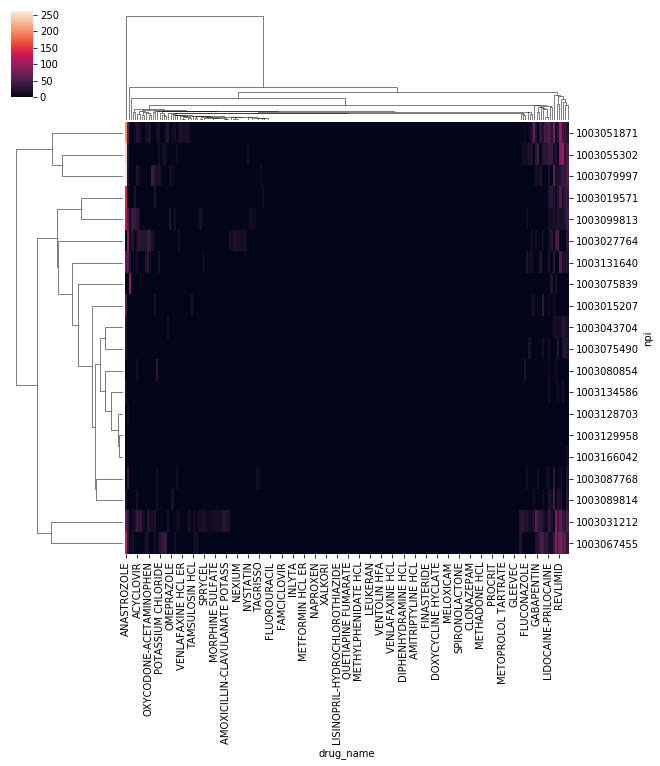

In [4]:
sns.clustermap(npi_claims_top[:20])

In [4]:
from scipy.cluster import hierarchy as hr
from scipy.spatial.distance import pdist, squareform

In [37]:
npi_claims_top[:200].index.values

array([1003015207, 1003019571, 1003027764, 1003031212, 1003043704,
       1003051871, 1003055302, 1003067455, 1003075490, 1003075839,
       1003079997, 1003080854, 1003087768, 1003089814, 1003099813,
       1003128703, 1003129958, 1003131640, 1003134586, 1003166042,
       1003258583, 1003801689, 1003803685, 1003804204, 1003804287,
       1003805375, 1003805409, 1003807355, 1003807645, 1003809435,
       1003810383, 1003812231, 1003819269, 1003820648, 1003821430,
       1003824210, 1003824889, 1003828823, 1003832163, 1003834920,
       1003838145, 1003839820, 1003850645, 1003851460, 1003852732,
       1003852856, 1003853680, 1003855818, 1003857269, 1003859679,
       1003861477, 1003862236, 1003864380, 1003865338, 1003866997,
       1003869108, 1003869413, 1003869447, 1003870171, 1003870759,
       1003871336, 1003875295, 1003875535, 1003877440, 1003880469,
       1003881145, 1003882432, 1003882952, 1003883562, 1003884081,
       1003886573, 1003886698, 1003887100, 1003888074, 1003891

In [28]:
hr_dists = pdist(npi_claims_top[:200])
hr_dists.shape

(19900,)

In [29]:
top_drugs

Index(['ANASTROZOLE', 'LETROZOLE', 'TAMOXIFEN CITRATE',
       'HYDROCODONE-ACETAMINOPHEN', 'DEXAMETHASONE', 'PREDNISONE',
       'HYDROXYUREA', 'ONDANSETRON HCL', 'WARFARIN SODIUM',
       'PROCHLORPERAZINE MALEATE',
       ...
       'BOSULIF', 'VARUBI', 'TAFINLAR', 'BUPROPION XL', 'ZARXIO', 'DAPSONE',
       'FLUOROURACIL', 'DUTASTERIDE', 'OPDIVO', 'TIZANIDINE HCL'],
      dtype='object', name='drug_name', length=200)

In [30]:
hr_dist_sq = squareform(hr_dists)
hr_dist_sq.shape

(200, 200)

In [31]:
hr_clusters = hr.linkage(hr_dist_sq, optimal_ordering=True)
hr_clusters.shape

/Users/mattheweng/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


(199, 4)

In [42]:
npi_claims_top[npi_claims_top['IMBRUVICA'] > 200]

drug_name,ANASTROZOLE,LETROZOLE,TAMOXIFEN CITRATE,HYDROCODONE-ACETAMINOPHEN,DEXAMETHASONE,PREDNISONE,HYDROXYUREA,ONDANSETRON HCL,WARFARIN SODIUM,PROCHLORPERAZINE MALEATE,...,BOSULIF,VARUBI,TAFINLAR,BUPROPION XL,ZARXIO,DAPSONE,FLUOROURACIL,DUTASTERIDE,OPDIVO,TIZANIDINE HCL
npi,,,,,,,,,,,,,,,,,,,,,
1053473983,0,0,0,0,19,29,0,16.0,0,0,...,0,0,0,0,0,33,0,0,0,0
1225015662,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437200920,50,0,0,58,22,49,117,30.0,38,0,...,0,0,0,0,0,0,0,0,0,0
1801980560,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# 1013947126 closest to 1437200920
npi_claims_top.loc[1013947126]['IMBRUVICA']

0.0

In [45]:
npi_claims_top.loc[1437200920]['IMBRUVICA']

263.0

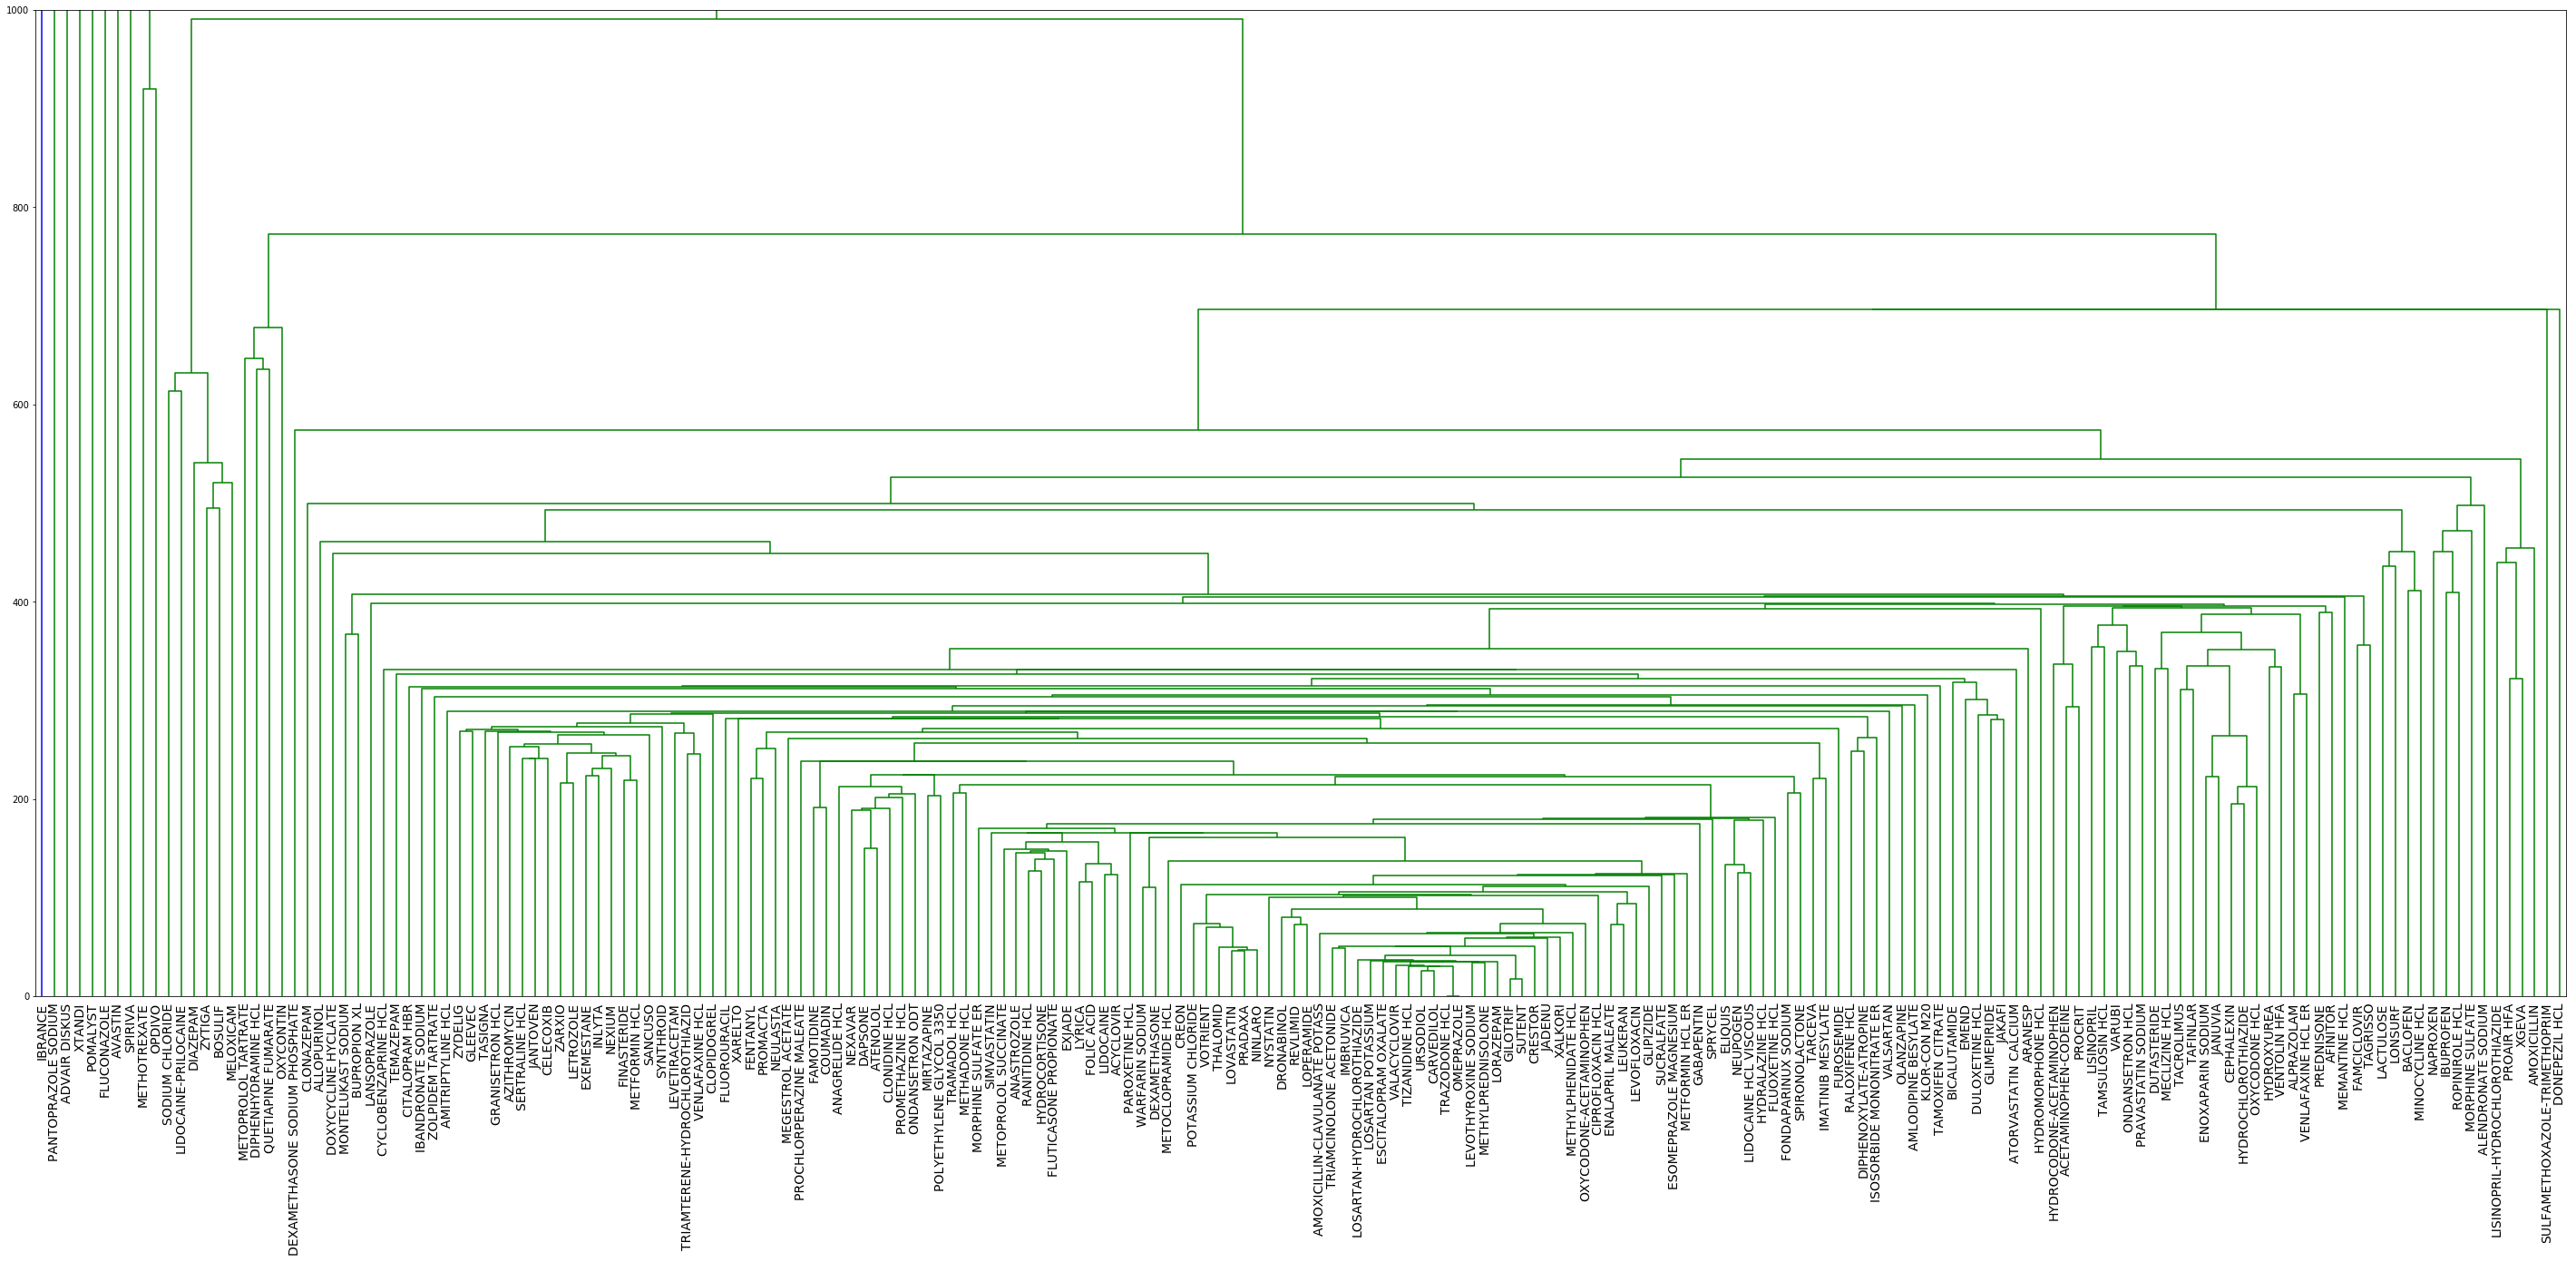

In [34]:
fig, axes = plt.subplots(figsize=(50, 20))
hr_dendro = hr.dendrogram(hr_clusters, labels=top_drugs, leaf_font_size=14)

plt.ylim(0, 1000)

plt.show()

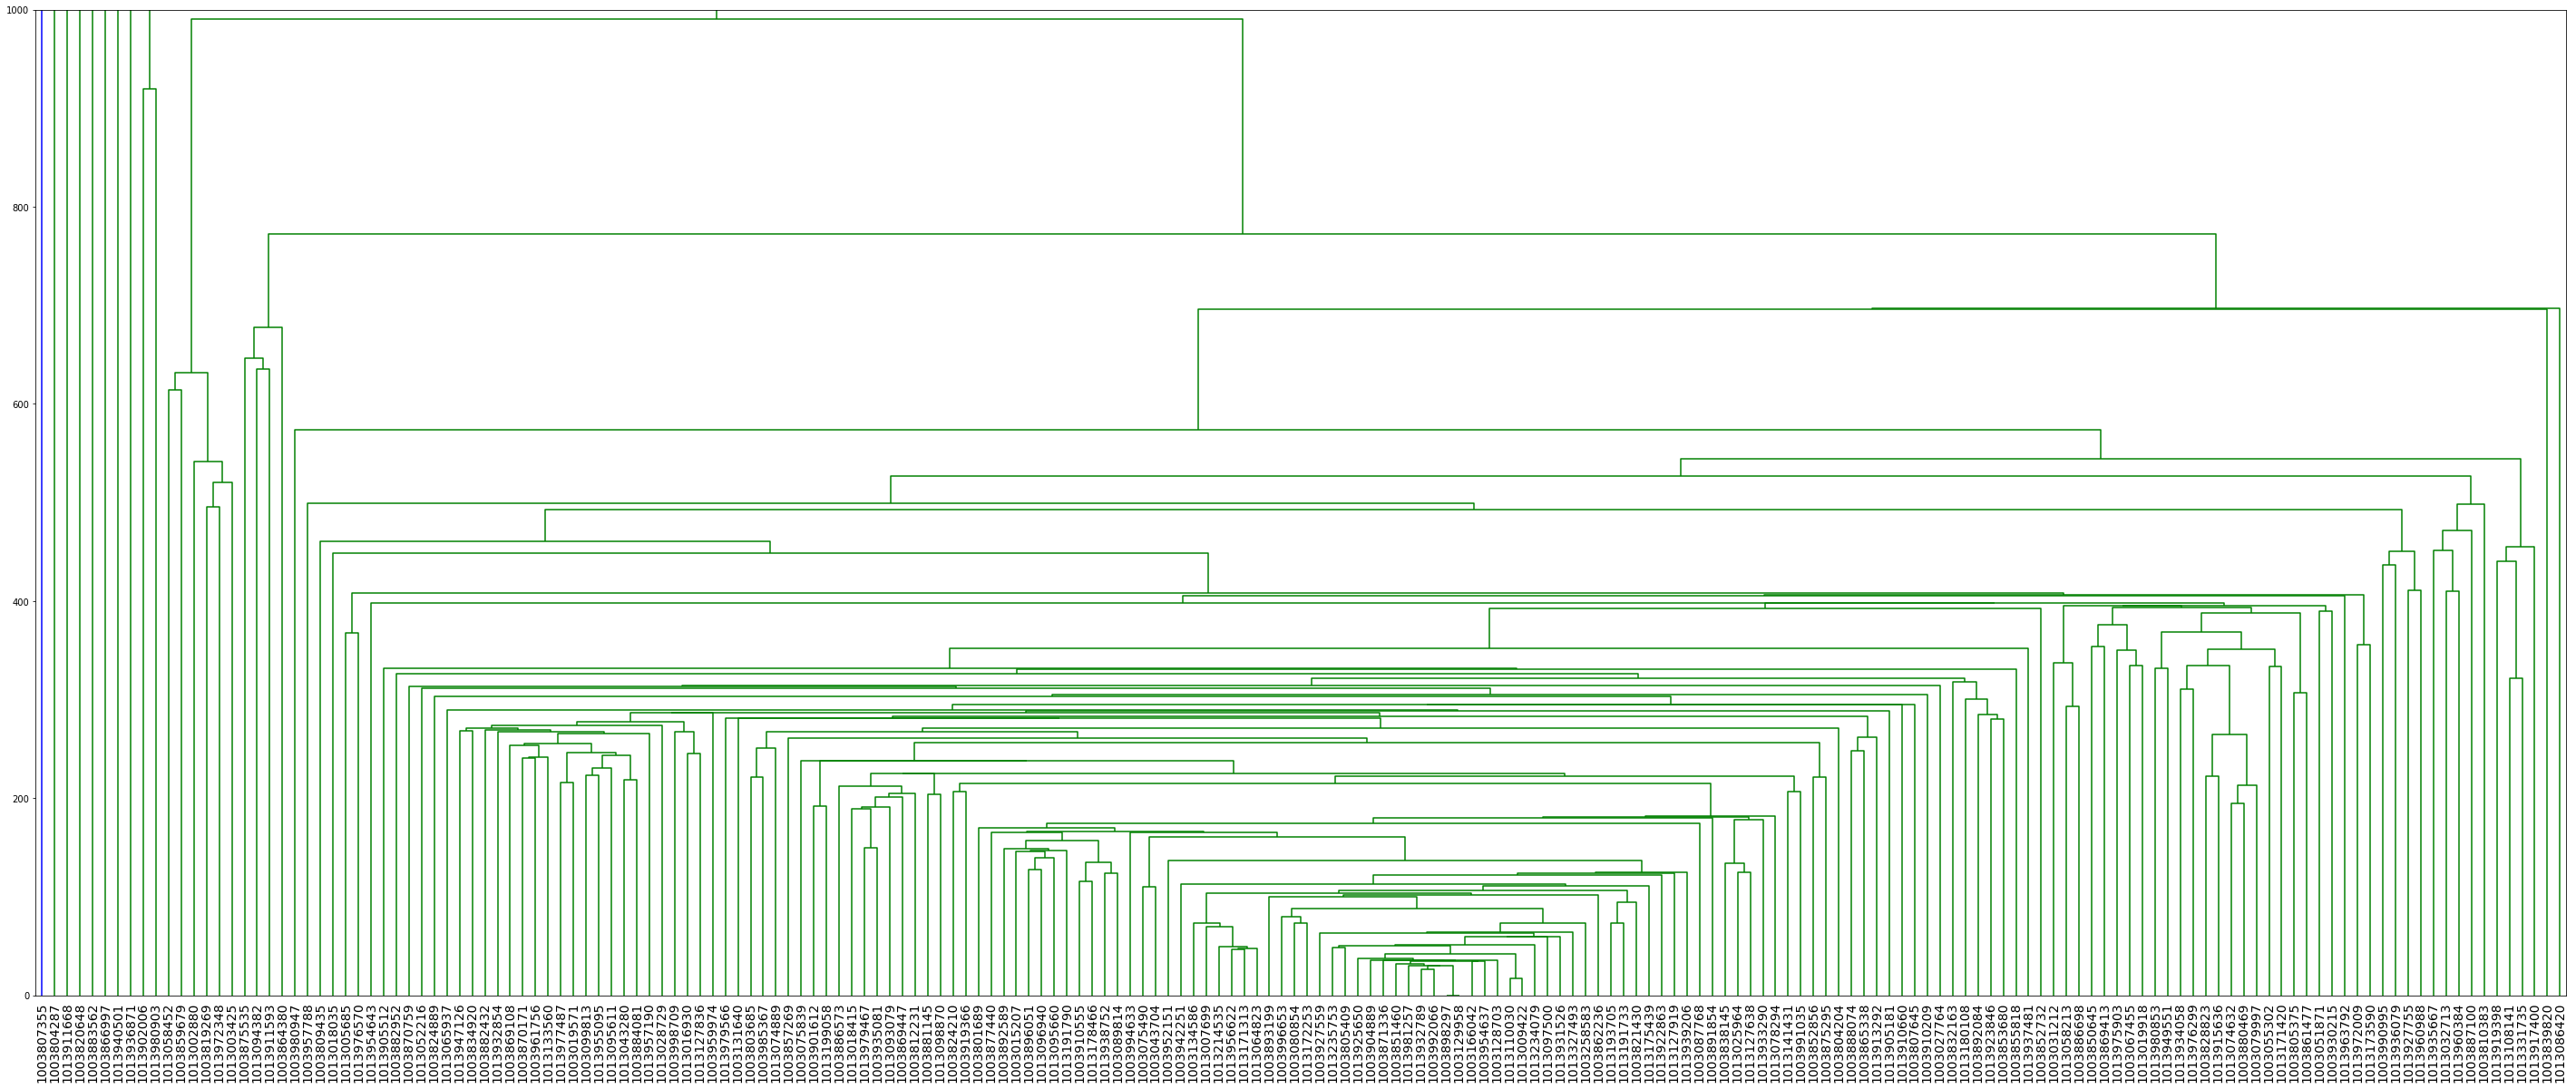

In [38]:
fig, axes = plt.subplots(figsize=(50, 20))
hr_dendro = hr.dendrogram(hr_clusters, labels=npi_claims_top[:200].index.values, leaf_font_size=14)

plt.ylim(0, 1000)

plt.show()

Hierarchical clustering is computationally intensive than Kmeans. In order to visualize a dendogram that is sensible (doesn't have too much data, I will subset the dataset that only contains physicians that have at least claims from the first 200 drugs.

I used the pdist function to compute a similarity matrix of our data (pairwise distances), using Euclidean distance.

Use scipy's squareform function to get our long vector of distances back into a square matrix. Look at the shape of this new matrix.

Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

Visualize clusters using dendrogram.

To make your clusters more interpretable, change the labels on the data to be the titles of the articles. Can you find any interesting clusters or discover any topics not present in the NYT sections? Are there any overlaps with the Kmeans topics and the hierarchical topics?

In addition, we might also be interested in how these hierarchical clusters compare to the NYT sections. Label each point not only with the title but also the NYT section it belongs to. Do any cross section topics emerge?

Explore different clusterings on a per section basis. Perform the same analysis on each of the Arts, Books, and Movies sections (i.e. cluster one section at a time).

Repeat this process using cosine similarity (and if you have time, Pearson correlation and the Jaccard distance). Read about scipys distance metrics here. Why might cosine distance be better for clustering the words of our articles?

Compare the clusters returned with cosine and Euclidean distance metrics.

We have visualized similarity between articles, but we can also see which words are similar and co-occur. This dendrogram is somewhat less-sensical, but lets look at it anyway. First limit the number of features with the vectorizer (if you haven't already). 500-1000 words is probably the limit of what you can visualize effectively. Transpose your feature matrix so now rows correspond to words and the columns correspond to the articles.

Perform the same analysis as above and inspect the dendrogram with the words from the articles. Anything you wouldn't expect?

